In [3]:
import os
os.chdir(r'G:\Ext_Disk_SharedFolder\Career\Oracle\ADW Challenge - Candidate Pack')
os.getcwd()

'G:\\Ext_Disk_SharedFolder\\Career\\Oracle\\ADW Challenge - Candidate Pack'

## Data Loading

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
Calendar = pd.read_excel('PCW15 D Calendar.xlsx',  parse_dates=True)
Items = pd.read_excel('PCW15 D Items.xlsx')
Stores = pd.read_excel('PCW15 D Stores.xlsx')
Warehouse = pd.read_excel('PCW15 D Warehouse.xlsx')
Deliveries = pd.read_excel('PCW15 F Deliveries.xlsx')
Sales = pd.read_excel('PCW15 F Sales.xlsx')

# Analyze Sales

## Item Names:

In [7]:
salesitems = pd.merge(Sales, Items, how= 'left', on= 'Item Id')
salesitems.head()

,Order #,Sales Date,Store Id,Item Id,Units,Revenue,OS,Category,Item Type,Item Name,RRP
0,Ord 0001,2012-08-01,1,3,52,5980.00,Android,Mobile,Tablet,Samsun Galaxy Tab 3,115.00
1,Ord 0002,2012-08-01,2,15,38,7211.26,IOS,Mobile,Smart Phone,iPhone 4,189.77
2,Ord 0003,2012-08-01,3,36,40,35999.60,Windows,Computer,Desktop,HP Workstation Z1G2,899.99
3,Ord 0004,2012-08-01,4,10,50,19950.00,IOS,Mobile,Tablet,iPad Air,399.00
4,Ord 0005,2012-08-01,5,10,20,7980.00,IOS,Mobile,Tablet,iPad Air,399.00


In [8]:
salesitems.shape

(12932, 11)

In [219]:
print(salesitems[salesitems['Item Type']=='Smart Phone']['Item Name'].unique().shape)
print(salesitems[salesitems['Item Type']=='Desktop']['Item Name'].unique().shape)
print(salesitems[salesitems['Item Type']=='Tablet']['Item Name'].unique().shape)
print(salesitems[salesitems['Item Type']=='Laptop']['Item Name'].unique().shape)

(10,)
(8,)
(7,)
(16,)


In [11]:
salavg = salesitems.groupby('Store Id').agg({'Revenue': [np.sum, np.mean]})
salavg

Revenue              
                  sum          mean
Store Id                           
1         57002437.13  52828.950074
2         57104709.15  52825.817900
3         48089704.70  44486.313321
4         48557512.07  44919.067595
5         47122713.90  43632.142500
6         40572302.19  37636.643961
7         39638922.82  36942.146151
8         41052506.45  38259.558667
9         40228118.51  37421.505591
10        40650113.31  37673.877025
11        38751771.94  36115.351295
12        57859563.33  53623.320973

In [13]:
rev_str_itm = salesitems.groupby(['Store Id', 'Item Name']).agg({'Revenue': [np.mean]})
rev_str_itm.columns

MultiIndex(levels=[['Revenue'], ['mean']],
           codes=[[0], [0]])

In [15]:
rev_str_itm1 = rev_str_itm.unstack()
rev_str_itm1.columns = rev_str_itm1.columns.droplevel([0,1])
rev_str_itm1

Item Name,ASUS GLX 1,ASUS GLX 2,ASUS GLX 3,ASUS Trans TX1,HP ProBook 1,HP ProBook 2,HP ProBook 3,HP Stream 1,HP Stream 2,HP Stream 3,...,iMac 27,iMac Retina 27,iPad Air,iPad Air 2,iPad Mini,iPad Mini 2,iPad Mini 3,iPhone 4,iPhone 5,iPhone 6
Store Id,,,,,,,,,,,,,,,,,,,,,
1,25649.911304,30537.005882,16894.490714,26181.818182,18015.259091,48801.330667,48103.548387,8290.590909,18317.477273,14649.186111,...,88756.875000,181743.618333,30407.511628,90942.750000,29955.627907,57333.250000,57397.200000,11164.801667,45766.767073,139776.03000
2,23306.480870,30142.416000,11866.534286,22630.400000,14407.591304,33186.120833,59262.666667,9089.707317,17564.545263,15581.991429,...,100367.808219,195990.413478,28462.000000,80463.750000,23334.458333,48044.578947,35492.554286,9637.015652,42401.443714,124160.24250
3,28310.533333,30004.486667,11824.750714,31449.600000,17934.685714,32499.829091,49190.068966,8818.733333,13794.763529,12764.290833,...,84509.701493,125189.907143,28184.680851,82834.000000,22821.500000,53222.000000,34909.797000,14558.070000,39777.052432,107326.62000
4,20067.317727,28483.025455,13113.077500,27936.000000,15277.562069,33819.443750,53980.750000,8871.240000,14256.118333,13463.252000,...,87808.730159,138299.371364,26464.285714,74500.700000,21332.400000,51712.050000,21421.455000,12795.920000,38386.475510,92810.81250
5,27210.778000,23508.695000,12535.071429,20659.200000,15313.863462,26751.560000,44166.847826,9063.512195,12652.846667,8819.510000,...,86758.108108,111014.880000,27495.471698,78881.920000,19337.651163,47051.727273,43714.117500,10085.924074,40129.431538,115222.90500
6,25074.705652,18742.162353,9840.495333,15988.363636,17590.590000,27283.551250,37468.733333,7723.323529,7461.713000,10055.441333,...,62126.554054,132676.320000,26307.400000,57211.434783,20410.684211,35467.095238,24276.672857,10658.748333,32886.403750,110272.99500
7,27016.266818,19523.800000,8293.574667,16216.615385,16506.969231,32527.465000,39581.500000,7238.025641,10823.794211,13473.537143,...,69507.812500,91399.584545,33013.083333,65793.150000,21082.551020,32325.222222,31184.103750,8343.102500,35508.572439,94117.03875
8,23362.023214,18970.140000,7484.616154,17056.000000,16153.004348,25265.362222,40806.093750,8338.069767,12050.536500,8129.548333,...,63383.283582,107956.652143,22239.000000,61469.407407,16852.727273,47516.083333,37841.154000,12200.374516,35315.101860,87815.07000
9,22116.366818,17134.320000,6854.648462,12672.000000,16174.584000,34140.976923,33354.975000,8398.868421,8604.430952,9707.460667,...,75051.140625,103299.530455,26054.700000,60961.166667,17349.868421,31915.481481,34506.650000,9249.224783,30863.677059,62515.53000


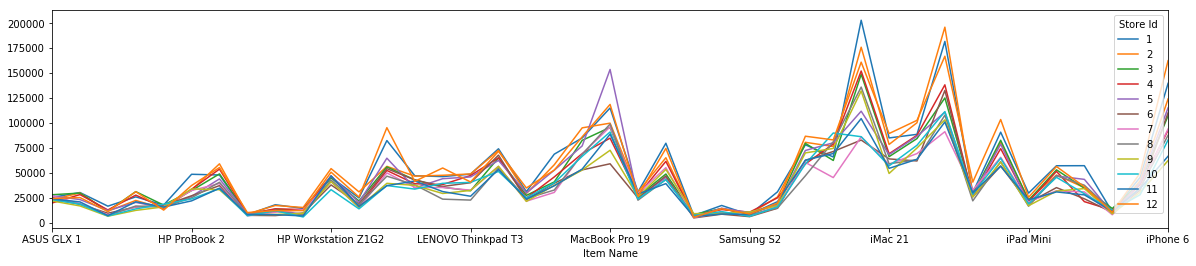

In [20]:
rev_str_itm1.transpose().plot(kind= 'line', figsize= (20,4))

### Sales Volumn

In [21]:
from pandasql import sqldf
msql = lambda q: sqldf(q, globals())
msql("SELECT * FROM Sales LIMIT 10;")

In [37]:
salesitems.head()

,Order #,Sales Date,Store Id,Item Id,Units,Revenue,OS,Category,Item Type,Item Name,RRP
0,Ord 0001,2012-08-01,1,3,52,5980.00,Android,Mobile,Tablet,Samsun Galaxy Tab 3,115.00
1,Ord 0002,2012-08-01,2,15,38,7211.26,IOS,Mobile,Smart Phone,iPhone 4,189.77
2,Ord 0003,2012-08-01,3,36,40,35999.60,Windows,Computer,Desktop,HP Workstation Z1G2,899.99
3,Ord 0004,2012-08-01,4,10,50,19950.00,IOS,Mobile,Tablet,iPad Air,399.00
4,Ord 0005,2012-08-01,5,10,20,7980.00,IOS,Mobile,Tablet,iPad Air,399.00


In [57]:
# Total Items Sold
print('Total units sold', salesitems['Units'].sum())
salesitems.groupby('Item Type').agg({'Units': np.sum}).sort_values(by= 'Units', ascending= False)

Total units sold 908941


,Units
Item Type,
Smart Phone,273067
Laptop,243004
Tablet,205093
Desktop,187777


In [58]:
salesitems.groupby('Category').agg({'Units': np.sum}).sort_values(by= 'Units', ascending= False)

,Units
Category,
Mobile,478160
Computer,430781


<font color='blue'>
Volumn wise:
<br>Generally, *Mobile* category is higher than *Computer*. 
<br>While *Smart Phone* shows the highest volumn of all, it is noticeable that *Desktop* has the lowest among all other item types.

### Sales Revenue

In [60]:
# Total Revenue
print('Total Revenue', salesitems['Revenue'].sum())
salesitems.groupby('Item Type').agg({'Revenue': np.sum}).sort_values(by= 'Revenue', ascending= False)

Total Revenue 556630375.5


,Revenue
Item Type,
Desktop,2.331968e+08
Laptop,1.443601e+08
Smart Phone,1.155237e+08
Tablet,6.354970e+07


In [61]:
salesitems.groupby('Category').agg({'Revenue': np.sum}).sort_values(by= 'Revenue', ascending= False)

,Revenue
Category,
Computer,3.775570e+08
Mobile,1.790734e+08


<font color='blue'>
Revenue wise:
<br>*Computer* category is way higher than *Mobile*. 
<br>Although *Desktop* has the lowest Sale Volume, it has the highest Revenue.

### Trends

In [81]:
# Add Calendar

salestrend = salesitems.merge(Calendar[['Day Date', 'D Nm', 'Day in Month',  'Week End', 'Mth Nm', 'Qtr', 'Year', 'Per Y Qtr']], how= 'left', left_on= 'Sales Date', right_on='Day Date').drop('Day Date', axis=1)
salestrend.head()

,Order #,Sales Date,Store Id,Item Id,Units,Revenue,OS,Category,Item Type,Item Name,RRP,D Nm,Day in Month,Week End,Mth Nm,Qtr,Year,Per Y Qtr
0,Ord 0001,2012-08-01,1,3,52,5980.00,Android,Mobile,Tablet,Samsun Galaxy Tab 3,115.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
1,Ord 0002,2012-08-01,2,15,38,7211.26,IOS,Mobile,Smart Phone,iPhone 4,189.77,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
2,Ord 0003,2012-08-01,3,36,40,35999.60,Windows,Computer,Desktop,HP Workstation Z1G2,899.99,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
3,Ord 0004,2012-08-01,4,10,50,19950.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
4,Ord 0005,2012-08-01,5,10,20,7980.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3


In [68]:
salestrend.shape

(12932, 17)

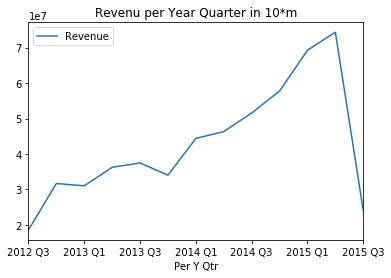

In [93]:
salestrend.groupby('Per Y Qtr').agg({'Revenue': np.sum}).plot(kind= 'line')
plt.title('Revenu per Year Quarter in 10*m');

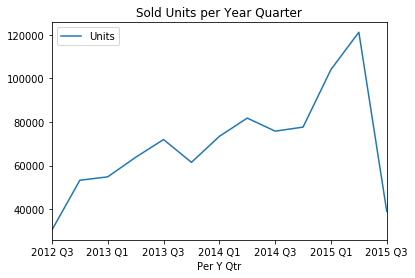

In [95]:
salestrend.groupby('Per Y Qtr').agg({'Units': np.sum}).plot(kind= 'line')
plt.title('Sold Units per Year Quarter');

<font color='blue'>
In general, there is a dramatic increase in the revenue from quarter to another. The drop we see in Q3 2015 may not be actual! It just could be insufficient data.

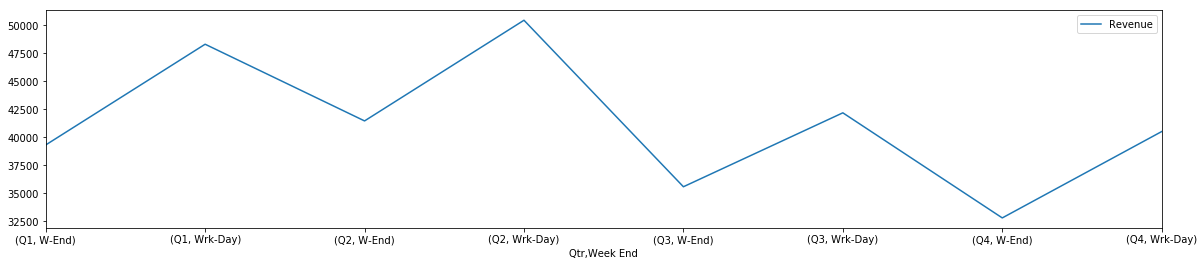

In [99]:
# Let's see if weekends have any impact on Revenue
salestrend.groupby(['Qtr','Week End']).agg({'Revenue': np.mean}).plot(kind= 'line', figsize= (20,4))

#This does not tell useful insights

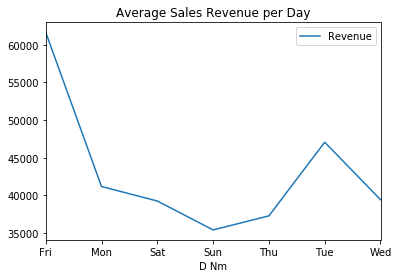

In [106]:
# Let's see if Different days have any impact on Revenue

salestrend.groupby('D Nm').agg({'Revenue': np.mean}).plot(kind= 'line')
plt.title('Average Sales Revenue per Day');

<font color='blue'>
The above graph clearly shows that highest Sales Revenue comes from Fridays, while the lowest is Sundays! It shows that weekends are not the best sale days!

#### Trend by Category

In [107]:
salestrend.head()

,Order #,Sales Date,Store Id,Item Id,Units,Revenue,OS,Category,Item Type,Item Name,RRP,D Nm,Day in Month,Week End,Mth Nm,Qtr,Year,Per Y Qtr
0,Ord 0001,2012-08-01,1,3,52,5980.00,Android,Mobile,Tablet,Samsun Galaxy Tab 3,115.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
1,Ord 0002,2012-08-01,2,15,38,7211.26,IOS,Mobile,Smart Phone,iPhone 4,189.77,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
2,Ord 0003,2012-08-01,3,36,40,35999.60,Windows,Computer,Desktop,HP Workstation Z1G2,899.99,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
3,Ord 0004,2012-08-01,4,10,50,19950.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3
4,Ord 0005,2012-08-01,5,10,20,7980.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3


In [108]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Category Plots')
ax1.plot(salestrend.groupby('Category').agg({'Revenue': np.sum}))

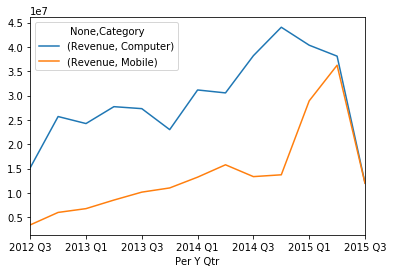

In [120]:
# By Category
catqtr = salestrend.groupby(['Per Y Qtr', 'Category']).agg({'Revenue': np.sum}).unstack().plot(kind= 'line');

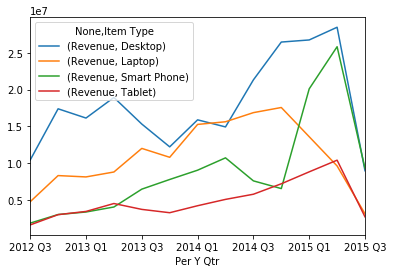

In [121]:
catqtr = salestrend.groupby(['Per Y Qtr', 'Item Type']).agg({'Revenue': np.sum}).unstack().plot(kind= 'line');

<font color='blue'>
from the above, We can see that both *Desktop* and 'Mobile* are booming since 2014 Q2 and Q4 respectively. <br>While *Laptop* and *Tablets* Revenue is slowing down starting 2015.

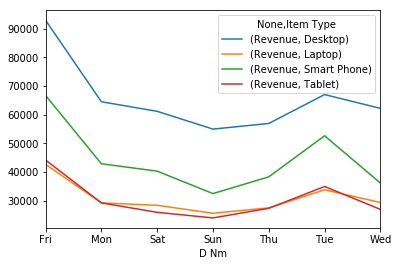

In [123]:
salestrend.groupby(['D Nm', 'Item Type']).agg({'Revenue': np.mean}).unstack().plot(kind= 'line');

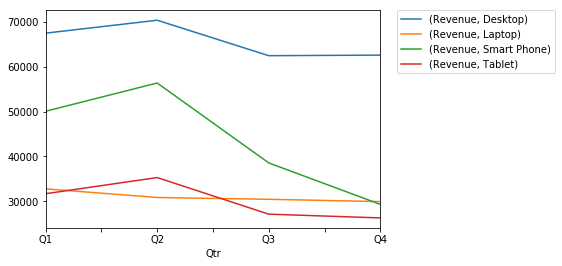

In [139]:
salestrend.groupby(['Qtr', 'Item Type']).agg({'Revenue': np.mean}).unstack().plot(kind= 'line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

## Stores Performance

In [130]:
salestrend.groupby(['Item Type']).agg({'Revenue': np.mean})

,Revenue
Item Type,
Desktop,65689.250552
Laptop,30938.732673
Smart Phone,44211.140237
Tablet,30218.592463


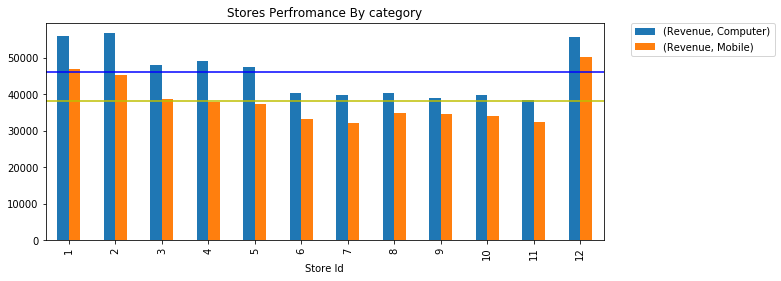

In [152]:
salestrend.groupby(['Store Id', 'Category']).agg({'Revenue': np.mean}).unstack().plot(kind= 'bar', figsize= (10, 4));
col= 'by'
for pos,val in enumerate(salestrend.groupby(['Category']).agg({'Revenue': np.mean})['Revenue'].sort_values(ascending= False)):
    plt.hlines(val, -1, 12, colors= col[pos], linestyles='solid')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Stores Perfromance By category');

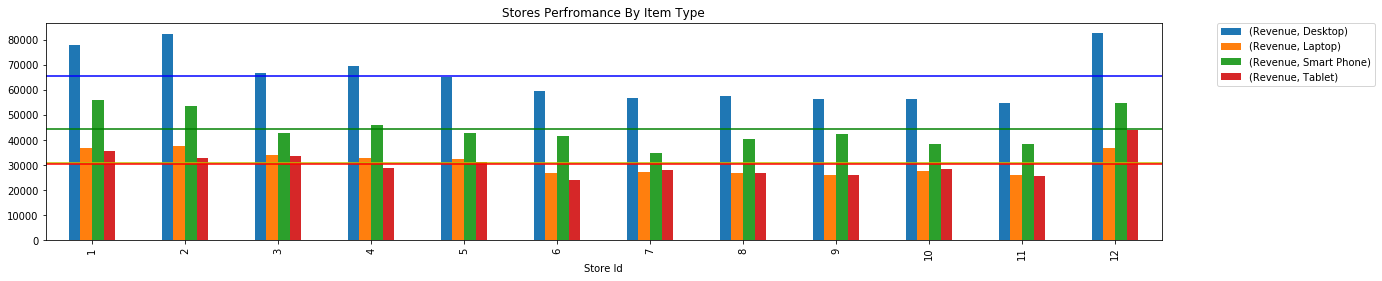

In [149]:
salestrend.groupby(['Store Id', 'Item Type']).agg({'Revenue': np.mean}).unstack().plot(kind= 'bar', figsize= (20, 4));
col= 'bgyr'
for pos,val in enumerate(salestrend.groupby(['Item Type']).agg({'Revenue': np.mean})['Revenue'].sort_values(ascending= False)):
    plt.hlines(val, -1, 12, colors= col[pos], linestyles='solid')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Stores Perfromance By Item Type');

<font color= 'blue'>
    Store 6 to 11 are generally underperfroming, while Store 1,2 and 12 are over perfroming in all item types / categories. <br>We may need to review the sale process in the underperfroming stores!

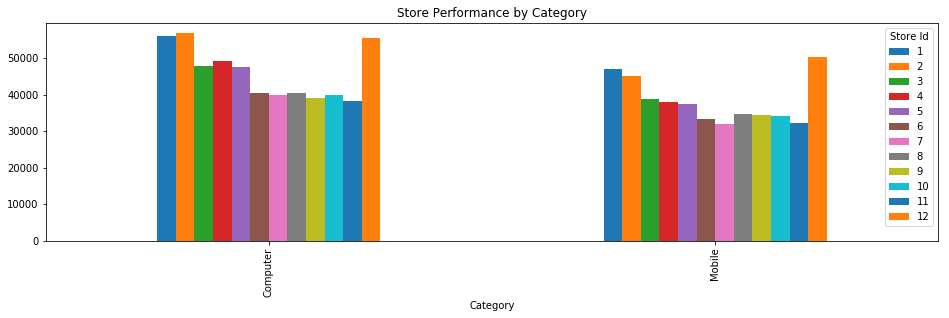

In [202]:
# Store Performance by Category:
rev_str_cat = salesitems.groupby(['Store Id', 'Category']).agg({'Revenue': [np.mean]})
rev_str_cat.columns
rev_str_cat1 = rev_str_cat.unstack()
rev_str_cat1.columns = rev_str_cat1.columns.droplevel([0,1])
rev_str_cat1
# Store Performance by item
rev_str_cat1.transpose().plot(kind= 'bar', figsize= (16,4))
plt.title('Store Performance by Category');

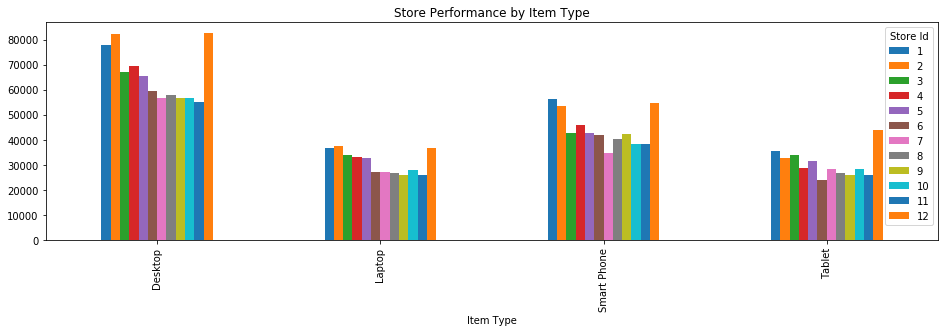

In [204]:
# Store Performance by Item Type:
rev_str_itmtype = salesitems.groupby(['Store Id', 'Item Type']).agg({'Revenue': [np.mean]})
rev_str_itmtype.columns
rev_str_itmtype1 = rev_str_itmtype.unstack()
rev_str_itmtype1.columns = rev_str_itmtype1.columns.droplevel([0,1])
rev_str_itmtype1
# Store Performance by item
rev_str_itmtype1.transpose().plot(kind= 'bar', figsize= (16,4))
plt.title('Store Performance by Item Type');

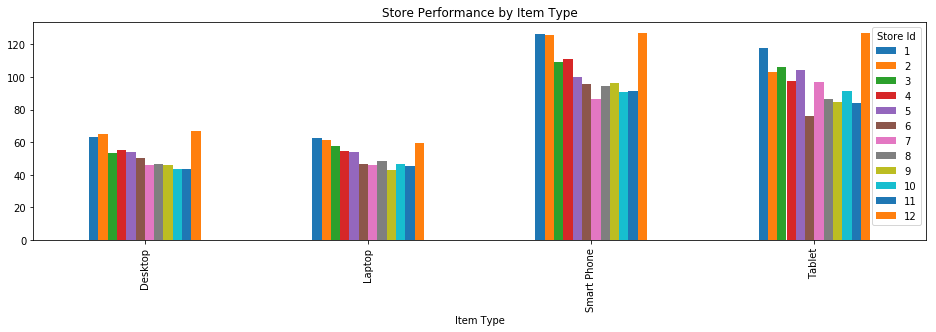

In [205]:
# Store Performance by Item Type:
rev_str_itmtype = salesitems.groupby(['Store Id', 'Item Type']).agg({'Units': [np.mean]})
rev_str_itmtype.columns
rev_str_itmtype1 = rev_str_itmtype.unstack()
rev_str_itmtype1.columns = rev_str_itmtype1.columns.droplevel([0,1])
rev_str_itmtype1
# Store Performance by item
rev_str_itmtype1.transpose().plot(kind= 'bar', figsize= (16,4))
plt.title('Store Performance by Item Type');

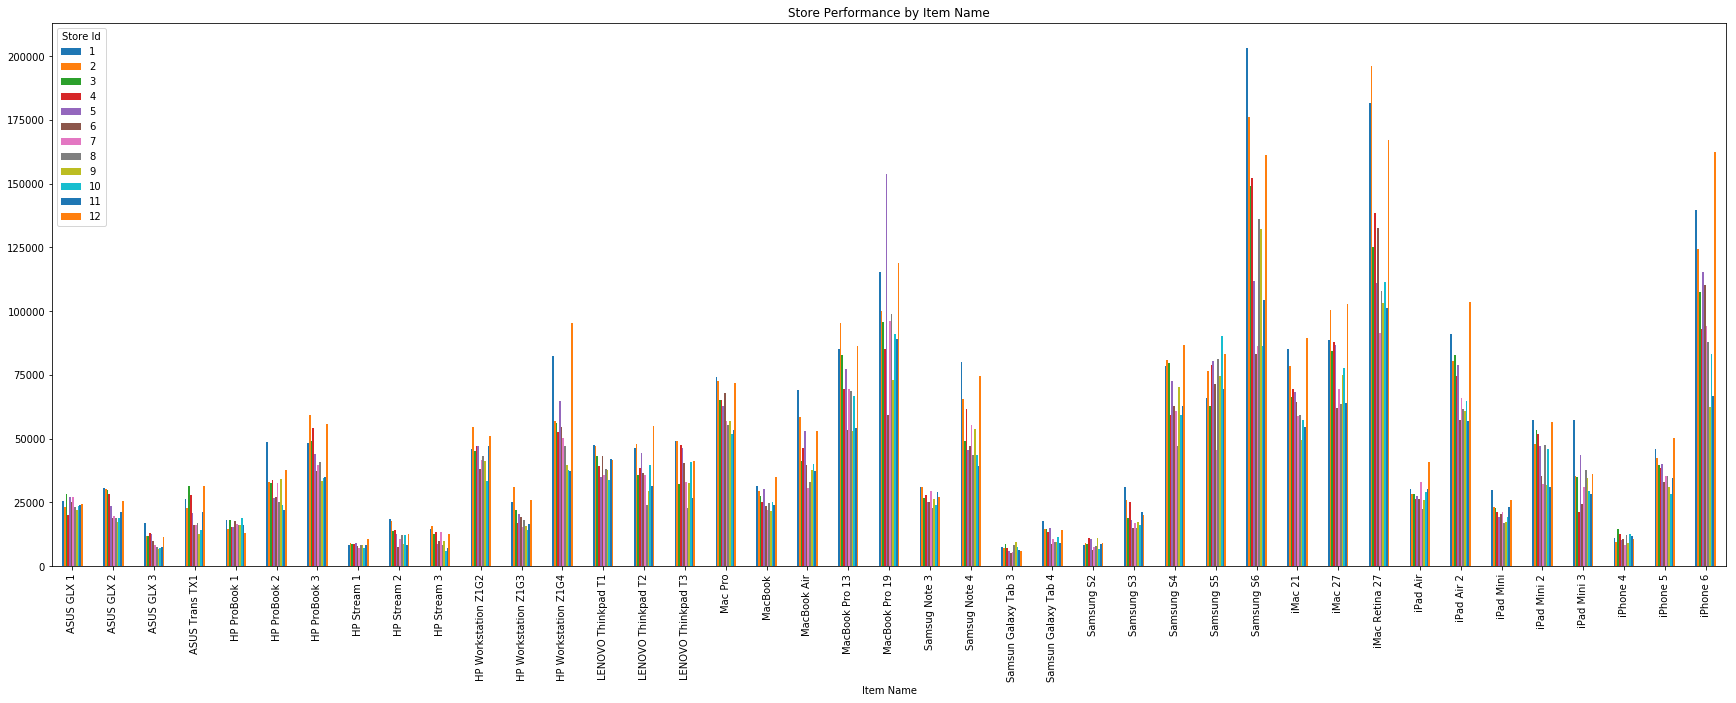

In [196]:
# Store Performance by item
rev_str_itm1.transpose().plot(kind= 'bar', figsize= (30,10))
plt.title('Store Performance by Item Name');

### Dig Deeper

In [157]:
salestrend.groupby(['Item Type']).agg({'Revenue': np.mean})

,Revenue
Item Type,
Desktop,65689.250552
Laptop,30938.732673
Smart Phone,44211.140237
Tablet,30218.592463


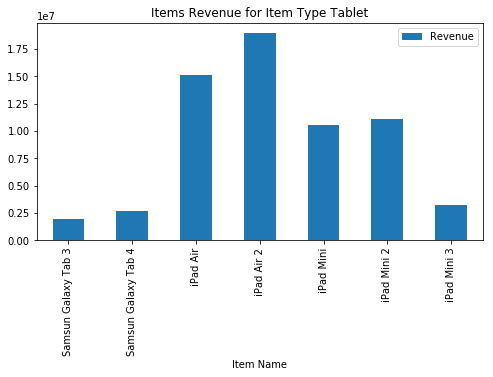

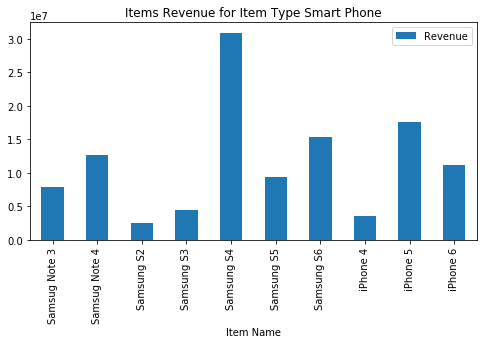

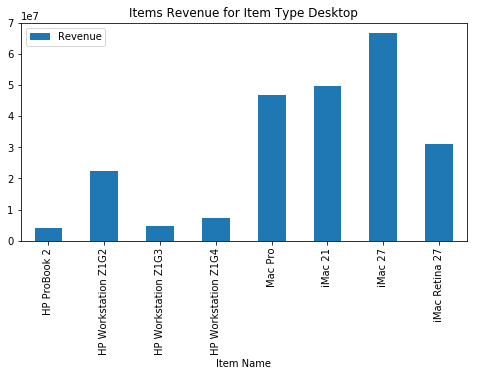

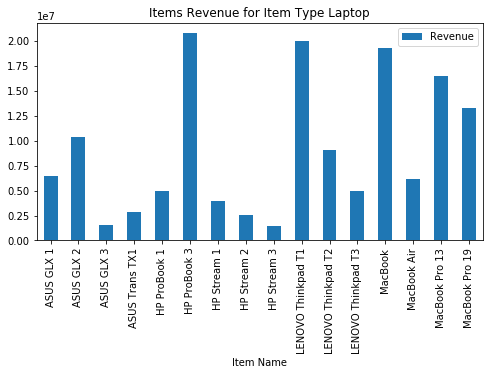

In [166]:
for i in salestrend['Item Type'].unique():
    salestrend[salestrend['Item Type'] == i].groupby(['Item Name']).agg({'Revenue': np.sum}).plot(kind= 'bar', figsize= (8, 4))
    plt.title('Items Revenue for Item Type ' + i);

In [177]:
#PCT of highest 16 items from all 41 items

(salestrend[salestrend['Item Name'].isin(
    ['iPad Air', 'iPdad Air2', 'iPad Mini', 'iPad Mini 2', 'Samsung S4', 'Samsung S6', 'iPhone 5', 'iPhone 6', 
     'iMac 27', 'iMac21', 'Mac Pro','HP ProBook 3', 'LENOVO Thinkpad T1', 'MacBook', 'MacBook Pro 13', 'MacBook Pro 19'])]['Revenue'].sum()/salestrend['Revenue'].sum())*100

56.655209816159235

#### Check insights from Stores States

In [181]:
storestate = salestrend.merge(Stores[['Store Id', 'State']], on= 'Store Id', how= 'left')
print('shape = ', storestate.shape)
storestate.head()

shape =  (12932, 19)


,Order #,Sales Date,Store Id,Item Id,Units,Revenue,OS,Category,Item Type,Item Name,RRP,D Nm,Day in Month,Week End,Mth Nm,Qtr,Year,Per Y Qtr,State
0,Ord 0001,2012-08-01,1,3,52,5980.00,Android,Mobile,Tablet,Samsun Galaxy Tab 3,115.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,CA
1,Ord 0002,2012-08-01,2,15,38,7211.26,IOS,Mobile,Smart Phone,iPhone 4,189.77,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,CA
2,Ord 0003,2012-08-01,3,36,40,35999.60,Windows,Computer,Desktop,HP Workstation Z1G2,899.99,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,CA
3,Ord 0004,2012-08-01,4,10,50,19950.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,MA
4,Ord 0005,2012-08-01,5,10,20,7980.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,MA


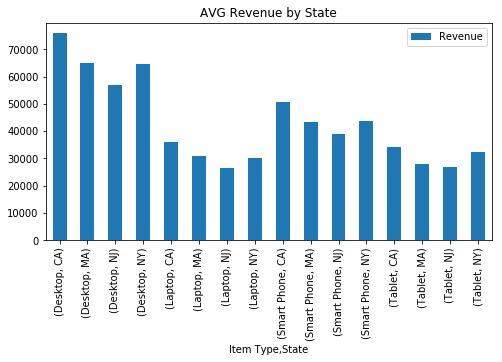

In [186]:
storestate.groupby(['Item Type', 'State']).agg({'Revenue': np.mean}).plot(kind= 'bar', figsize= (8, 4))
plt.title('AVG Revenue by State');

<font color = 'blue'>
In general, New Jersey state has the lowest performance among all other states.

### Delays

In [189]:
delivery = storestate.merge(Deliveries[['Order #', 'Days to Deliver']], how= 'left', on= 'Order #')
print(delivery.shape)
delivery.head()

(12932, 20)


,Order #,Sales Date,Store Id,Item Id,Units,Revenue,OS,Category,Item Type,Item Name,RRP,D Nm,Day in Month,Week End,Mth Nm,Qtr,Year,Per Y Qtr,State,Days to Deliver
0,Ord 0001,2012-08-01,1,3,52,5980.00,Android,Mobile,Tablet,Samsun Galaxy Tab 3,115.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,CA,1
1,Ord 0002,2012-08-01,2,15,38,7211.26,IOS,Mobile,Smart Phone,iPhone 4,189.77,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,CA,3
2,Ord 0003,2012-08-01,3,36,40,35999.60,Windows,Computer,Desktop,HP Workstation Z1G2,899.99,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,CA,4
3,Ord 0004,2012-08-01,4,10,50,19950.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,MA,4
4,Ord 0005,2012-08-01,5,10,20,7980.00,IOS,Mobile,Tablet,iPad Air,399.00,Wed,1,Wrk-Day,Aug,Q3,2012,2012 Q3,MA,3


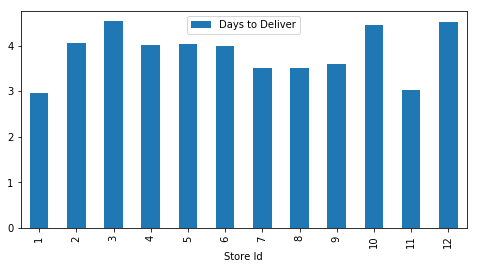

In [190]:
delivery.groupby(['Store Id']).agg({'Days to Deliver': np.mean}).plot(kind= 'bar', figsize= (8, 4))
plt.title('AVG Days of Delivery per Store')

<font color='blue'>
    We may be able to boost the performance of store 2 and 12 even more if we were able to discover and reduce the AVG Delivery time.

In [206]:
# Check if Wharehouse has any relation with delay:
delwh = delivery.merge(Warehouse[['Store Id', 'Warehouse Id', 'WH State']], how= 'left', on= 'Store Id')
print(delwh.shape)


(12932, 22)

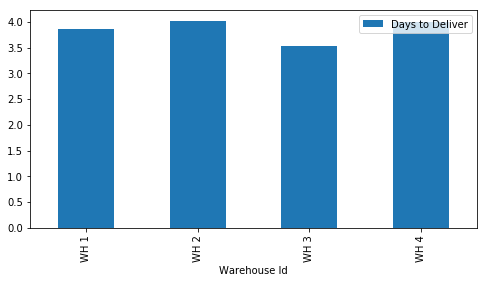

In [207]:
delwh.groupby(['Warehouse Id']).agg({'Days to Deliver': np.mean}).plot(kind= 'bar', figsize= (8, 4))

In [210]:
# Check store location to Wharehouse location:
stor_wh_loc = Stores[['Store Id', 'State', 'City']].merge(Warehouse[['Store Id', 'Warehouse Id', 'WH State', 'WH City']], how= 'left', on= 'Store Id')
stor_wh_loc

,Store Id,State,City,Warehouse Id,WH State,WH City
0,1,CA,Long Beach,WH 1,CA,La Puente
1,2,CA,San Diego,WH 1,CA,La Puente
2,3,CA,San Francisico,WH 1,CA,La Puente
3,4,MA,Boston,WH 2,MA,Reading
4,5,MA,Cambridge,WH 2,MA,Reading
5,6,MA,Lowell,WH 2,MA,Reading
6,7,NJ,Jersey City,WH 3,NJ,Newark
7,8,NJ,Newark,WH 3,NJ,Newark
8,9,NJ,Patterson,WH 3,NJ,Newark
9,10,NY,Buffalo,WH 4,NY,Rochester
